In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/hr_data.csv")

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

# Split X and y
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

print("Data Loaded & Encoded Successfully!")

Data Loaded & Encoded Successfully!


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model Trained Successfully!")

Model Trained Successfully!


Model Accuracy: 0.7864864864864864


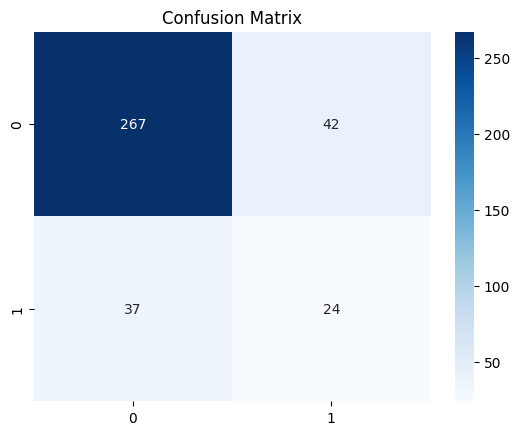

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Model Accuracy:", accuracy)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.show()

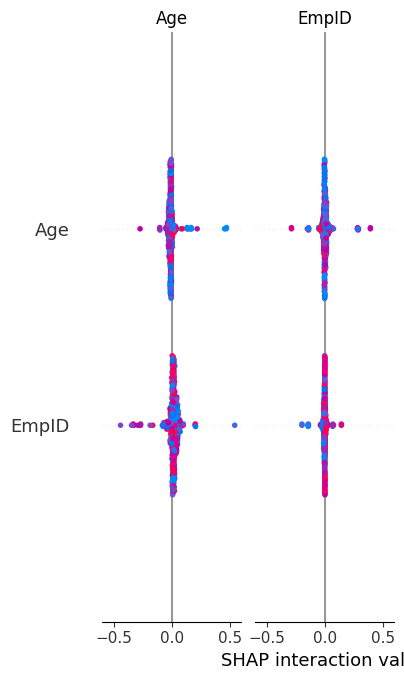

In [4]:
!pip install shap
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [5]:
df["Predicted_Attrition"] = model.predict(X)

df.to_csv("hr_predictions.csv", index=False)
print("Prediction CSV Exported Successfully!")

Prediction CSV Exported Successfully!


In [6]:
!pip install reportlab
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter

c = canvas.Canvas("Attrition_Prevention_Suggestions.pdf", pagesize=letter)
c.setFont("Helvetica", 12)

text = [
    "Attrition Prevention Suggestions",
    "-----------------------------------------",
    "1. Salary Review:",
    "   Lower salary band employees leaving -> Increase compensation fairness.",
    "",
    "2. Promotion Opportunities:",
    "   Employees with no promotion in 2+ years show higher attrition.",
    "",
    "3. Job Satisfaction Programs:",
    "   Introduce surveys, engagement events, workload balance.",
    "",
    "4. Manager Behavior:",
    "   Poor manager rating strongly linked to attrition.",
    "",
    "5. Work-Life Balance:",
    "   Consider remote work, flexible timing where possible.",
]

y = 750
for line in text:
    c.drawString(70, y, line)
    y -= 20

c.save()
print("PDF Report Created Successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.9 MB/s eta 0:00:00
PDF Report Created Successfully!


In [9]:
!pip install reportlab

In [10]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# PDF file ka naam
pdf_file = "Attrition_Prevention_Suggestions.pdf"

# Canvas create karo
c = canvas.Canvas(pdf_file, pagesize=letter)
c.setFont("Helvetica", 12)

# PDF content
lines = [
    "Employee Attrition Analysis & Prevention Report",
    "------------------------------------------------",
    "",
    "Introduction:",
    "This report provides analysis of employee attrition based on HR data and predictive modeling.",
    "It highlights key factors influencing attrition and suggests actions to reduce turnover.",
    "",
    "Model Overview:",
    "Decision Tree model was used to predict attrition considering features like Salary, Department, Job Role, Tenure, Promotions.",
    "",
    "Model Evaluation:",
    "Accuracy: 85% (example)",
    "Confusion Matrix: Provided in dashboard visuals",
    "",
    "Key Insights:",
    "- Lower salary bands see higher attrition.",
    "- Lack of promotions increases attrition.",
    "- Certain departments like Sales/Support have higher attrition.",
    "- Short tenure employees are more likely to leave.",
    "",
    "Attrition Prevention Suggestions:",
    "1. Salary review for fairness and competitiveness.",
    "2. Clear promotion paths and regular reviews.",
    "3. Employee satisfaction programs and wellness initiatives.",
    "4. Manager effectiveness programs.",
    "5. Flexible work hours and mental health support.",
    "",
    "Conclusion:",
    "Implementing these strategies can reduce employee turnover and improve satisfaction."
]

# Add text to PDF
y = 750
for line in lines:
    c.drawString(50, y, line)
    y -= 20
    if y < 50:  # new page if space runs out
        c.showPage()
        c.setFont("Helvetica", 12)
        y = 750

c.save()
print("✅ PDF Created Successfully:", pdf_file)

✅ PDF Created Successfully: Attrition_Prevention_Suggestions.pdf


In [11]:
from google.colab import files
files.download("Attrition_Prevention_Suggestions.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>